# Pandas-基于Python的数据科学

对于类似于矢量、矩阵（和高维张量）的数值数据，Numpy和numpy数组是我们的首选工具。

从实验中收集数据的地方，尤其是我们要从不同数据源的组合中提取有意义的数据，以及对于数据经常有不完整的地方等问题，pandas库提供了许多有用的工具（并已成为数据科学家的标准工具）。

在本节中，我们介绍Pandas的基础知识。

特别是，我们介绍了Pandas中的两种关键数据类型：Series和DataFrame对象。

按照惯例，`pandas`库以`pd`的名称导入（与`numpy`以`np`的名称导入相同：

In [1]:
import pandas as pd

## 示例（Series）

假设我们正在为蔬菜水果商或超市开发软件，并且需要跟踪超市中可用的苹果（apple，10），橙子（Orange，3）和香蕉（Banana，22）的数量。

我们可以使用python列表（或numpy数组）来跟踪这些数字：

In [2]:
stock = [10, 3, 22]

但是，我们需要单独记住条目的顺序是苹果、橙子和香蕉。这需要通过第二个列表来实现：

In [3]:
stocklabels = ['apple', 'orange', 'banana']

In [4]:
assert len(stocklabels) == len(stock)  # check labels and 
                                       # stock are consistent
for label, count in zip(stocklabels, stock):
    print(f'{label:10s} : {count:4d}')

apple      :   10
orange     :    3
banana     :   22


上面的2列表解决方案在两个方面有点尴尬：首先，我们使用两个列表来描述一组数据（例如需要谨慎地同时更新它们），其次对列表的访问给定标签的数据很不方便：我们需要找到带有一个列表的标签索引，然后将其用作另一个列表的索引，例如

In [5]:
index = stocklabels.index('banana')
bananas = stock[index]
print(f"There are {bananas} bananas [index={index}].")

There are 22 bananas [index=2].


在“字典”部分中，我们遇到了类似的示例。字典确实是一种更方便的解决方案：

In [6]:
stock_dic = {'apple': 10, 
             'orange': 3,
             'banana': 22}

在某种程度上，字典的键包含商品标签，而值包含实际价格：

In [7]:
stock_dic.keys()

dict_keys(['apple', 'orange', 'banana'])

In [8]:
stock_dic.values()

dict_values([10, 3, 22])

要检索（或更改）`apple`的值，我们使用`apple`作为键，并通过字典的索引符号检索该值：

In [9]:
stock_dic['apple']

10

我们可以将库存总结如下：

In [10]:
for label in stock_dic:
    print(f'{label:10s} : {stock_dic[label]:4d}')

apple      :   10
orange     :    3
banana     :   22


与2列表解决方案相比，这是一个巨大的改进：（i）我们仅维护一个结构，该结构包含每个键的值-因此我们无需检查列表的长度是否相同。 （ii）我们可以通过标签访问单个元素（使用它作为字典的键）。

Pandas的Series对象解决了上面的需求。它类似于字典，但是针对给定的问题进行了改进：

* 保持项目顺序
* 值必须具有相同的类型（更高的执行性能）
* 大量便利功能，例如处理丢失的数据、时间序列、排序、绘图等

### 库存示例-`Series`

我们可以从字典中创建一个“系列”对象，例如：

In [11]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22})

默认显示方式是每行显示一个条目，标签在左侧，值在右侧。

In [12]:
type(stock)

pandas.core.series.Series

In [13]:
stock

apple     10
orange     3
banana    22
dtype: int64

左侧的项目称为“Series”的`索引`，可以作为`Series`对象的`索引`属性使用：

In [14]:
stock.index

Index(['apple', 'orange', 'banana'], dtype='object')

In [15]:
type(stock.index)

pandas.core.indexes.base.Index

我们还可以使用`values`属性访问每个项目的值列表：

In [16]:
stock.values

array([10,  3, 22])

关于数据访问，` Series`对象的行为类似于字典：

In [17]:
stock['apple']

10

In [18]:
stock['potato'] = 101    # adding more values
stock['cucumber'] = 1


In [19]:
print(stock)

apple        10
orange        3
banana       22
potato      101
cucumber      1
dtype: int64


In [20]:
stock

apple        10
orange        3
banana       22
potato      101
cucumber      1
dtype: int64

我们可以将数据绘制为条形图：

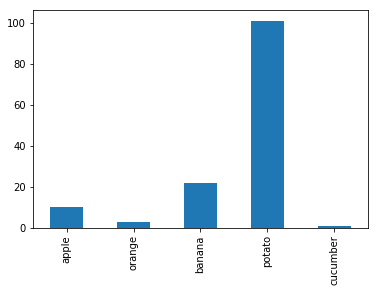

In [21]:
%matplotlib inline
stock.plot(kind='bar')

我们可以根据“Series”中的值对数据进行排序（然后绘图以可视化）：

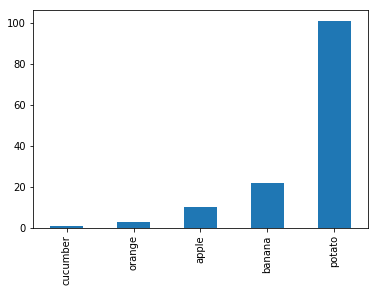

In [22]:
stock.sort_values().plot(kind='bar')

或对索引进行排序以获得我们的水果和蔬菜的字母顺序：

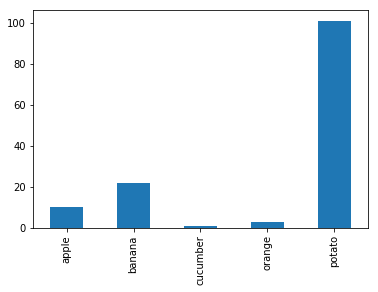

In [23]:
stock.sort_index().plot(kind='bar')

`Series`对象具有许多可用的数值方法，包括`求平均值`和`求和`：

In [24]:
stock.sum()

137

In [25]:
stock.mean()

27.4

它的行为也像一个序列，因为`len`函数返回Series对象中的数据点数：

In [26]:
len(stock)

5

### 内存使用情况

对于较大的数据集，知道存储Series的字节数可能很重要。存储实际Series数据所需的字节可作为

In [27]:
stock.nbytes

40

或直接从基础的numpy数组：

In [28]:
stock.values.nbytes

40

它是40个字节，因为我们有5个元素存储为int64（每个元素需要8个字节）：

In [29]:
stock.dtype

dtype('int64')

Series对象需要额外的内存。可以使用以下查询：

In [30]:
stock.memory_usage()

240

### 统计

使用`describe（）`可以获得`库存`Series对象中数据的许多统计描述：

In [31]:
stock.describe()

count      5.000000
mean      27.400000
std       41.955929
min        1.000000
25%        3.000000
50%       10.000000
75%       22.000000
max      101.000000
dtype: float64

和往常一样，文档字符串提供文档（`help（stock.describe）`），而pandas主页（`https：// pandas.pydata.org`）提供指向Pandas文档的链接。

## 从列表创建系列

在上面的示例中，我们展示了如何从字典创建系列，其中字典条目的键用作Series对象的索引。

我们还可以从一个列表创建一个Series，提供一个附加索引：

In [32]:
stock = pd.Series([10, 3, 22], index=['apple', 'orange', 'banana'])

In [33]:
stock

apple     10
orange     3
banana    22
dtype: int64

如果我们省略`index`参数，那么Series将采用整数索引：

In [34]:
stock = pd.Series([10, 3, 22])

In [35]:
stock

0    10
1     3
2    22
dtype: int64

但是，可以随后添加索引：

In [36]:
stock.index = ['apple', 'orange', 'banana']

In [37]:
stock


apple     10
orange     3
banana    22
dtype: int64

## 绘制数据

通过Series对象的`plot()`方法可以轻松访问常用的绘图。我们已经在上方看到条形图。 `Series.plot()`方法接受诸如`kind =“bar”`之类的参数`kind`，但是有一个等效的`Series.plot.bar()`方法可用。

进一步的例子：

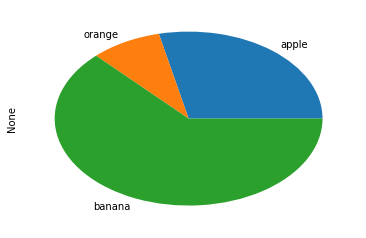

In [38]:
stock.plot.pie()


为了定制图，我们可以获取轴对象并随后对其进行修改：

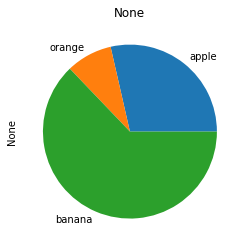

In [39]:
ax = stock.plot.pie()
ax.set_aspect(1)
ax.set_ylabel(None);
ax.set_title(None);

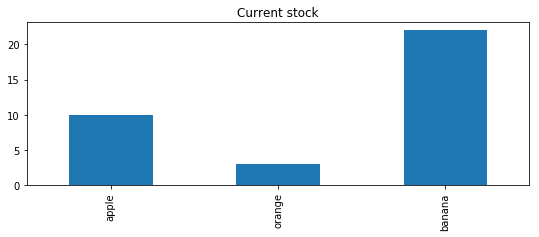

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
stock.plot.bar(ax=ax)
ax.set_title("Current stock");

我们还可以从系列中获取数据并自己“手动”绘图：

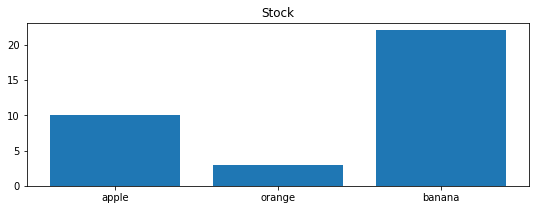

In [41]:
import matplotlib.pyplot as plt

names = list(stock.index)
values = list(stock.values)

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
ax.bar(names, values)
ax.set_title('Stock');

## 缺少的数值

“真实”数据集往往不完整。处理缺失的值是数据科学中的重要主题。在Pandas中达成的协议是，特殊的浮点值“ NaN”（代表`N`ot`a` `N`umber）代表丢失的数据点。例如，如果我们有一张库存表，但不知道`apple`的值，则可以将其替换为“ NaN”。

如果导入了numpy模块，则可以使用float（'nan'）或numpy.nan来创建Python中的特殊Nan值。

In [42]:
stock['apple'] = float('nan')

In [43]:
stock

apple      NaN
orange     3.0
banana    22.0
dtype: float64

请注意，当我们将`NaN`分配给`apple`时，`stock`系列对象的`dtype`已从`int64`更改为`float64`：整个系列已转换为float，因为仅定义了`NaN`用于浮点数。

（有建议创建一个`NaN`对象作为pandas的一部分-这样可以克服上述限制。）

假设我们需要使用`sum`函数计算总共有多少库存商品：

In [44]:
stock.values

array([nan,  3., 22.])

常见的情况是我们有一个不完整的Series或DataFrame（它们是具有相同索引的多个Series），我们希望进行分析，但是要以特殊的方式处理缺失的值。

In [45]:
stock.sum()

25.0

上面的示例`sum`显示了`NaN`值被简单地忽略了，这很方便。

我们还可以通过删除所有具有`NaN`值的条目来“整理” Series对象：

In [46]:
stock.dropna()

orange     3.0
banana    22.0
dtype: float64

## 系列数据访问：显式和隐式（`loc`和`iloc`）

In [47]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22,
                   'cucumber' : 1,
                   'potato' : 110})

In [48]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

### 索引

我们可以通过它们的索引访问单个值，就像stock Series对象将是一个字典一样：

In [49]:
stock['banana']

22

有一种等效且推荐的方法，可以使用`loc`（用于LOCation？）属性使用此检索：

In [50]:
stock.loc['banana']

22

为了方便起见，pandas（！）还允许我们在Series对象中使用整数索引。之所以称为*隐式*索引，是因为对象系列不使用整数作为索引，而是使用水果的名称。

例如，我们还可以通过其隐式索引2来检索“香蕉”的值，因为它位于Series对象的第3行中（从0开始计数，它需要索引2）：

In [51]:
stock[2]

22

在此示例中，此方法工作正常并且看起来很方便，但是如果对象的实际索引由整数组成，则会变得非常混乱。因此，使用间接索引的显式（推荐方法）是通过`iloc`（ImplicitLOCation）属性进行的：

In [52]:
stock.iloc[2]

22

### Slicing

### 切片

In [53]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

我们还可以切片该系列：

In [54]:
stock['orange':'potato']

orange        3
banana       22
cucumber      1
potato      110
dtype: int64

或跳过第二个条目：

In [55]:
stock['orange':'potato':2]

orange      3
cucumber    1
dtype: int64

### 数据操作

可以同时处理所有数据值，以处理numpy数组的方式对系列对象进行数值运算：

In [56]:
stock - stock.mean()

apple      -19.2
orange     -26.2
banana      -7.2
cucumber   -28.2
potato      80.8
dtype: float64

In [57]:
import numpy as np

In [58]:
np.sqrt(stock)

apple        3.162278
orange       1.732051
banana       4.690416
cucumber     1.000000
potato      10.488088
dtype: float64

在需要的地方，我们可以提取numpy数组并进行处理：

In [59]:
data = stock.values

In [60]:
type(data)

numpy.ndarray

In [61]:
data - data.mean()

array([-19.2, -26.2,  -7.2, -28.2,  80.8])

### Import and Export

Pandas (and its objects `Series` and `DataFrame`) support export to and import from a number of useful formats.

For example, we can write a `Series` object into a comma separated value file:

### 输入与输出

Pandas（及其对象`系列`和`数据框架`）支持多种有用格式的导出和导入。

例如，我们可以将`Series`对象写入以逗号分隔的值文件中：

In [62]:
stock.to_csv('stock.csv', header=False)

In [63]:
#NBVAL_IGNORE_OUTPUT
!cat stock.csv

apple,10
orange,3
banana,22
cucumber,1
potato,110


我们还可以创建表的$\LaTeX$表示形式：

In [64]:
stock.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &    0 \\\\\n\\midrule\napple    &   10 \\\\\norange   &    3 \\\\\nbanana   &   22 \\\\\ncucumber &    1 \\\\\npotato   &  110 \\\\\n\\bottomrule\n\\end{tabular}\n'

我们将回到读取`DataFrame`部分中的文件的方法。

## 数据框

### 库存示例-`DataFrame`

在介绍完上述`Series`对象之后，我们将重点介绍熊猫中的第二种重要类型：`DataFrame`。

首先，我们可以说`DataFrame`类似于（2d）电子表格：它包含行和列。

我们上面研究的系列对象是`DataFrame`的特例，其中`DataFrame`只有一列。

我们将继续我们的库存示例：

In [65]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

除了跟踪我们库存的每种类型的对象数之外，我们还有另一个Series对象，该对象提供每件商品的销售价格：

In [66]:
price = pd.Series({'apple': 0.55, 'banana': 0.50, 'cucumber' : 0.99, 'potato' : 0.17, 'orange': 1.76})
price

apple       0.55
banana      0.50
cucumber    0.99
potato      0.17
orange      1.76
dtype: float64

`DataFrame`对象允许我们将两个系列一起对待。实际上，创建`DataFrame`对象的一种便捷方法是组合一系列series，如下所示：

In [67]:
shop = pd.DataFrame({'stock' : stock, 'price' : price})
shop

stock  price
apple        10   0.55
banana       22   0.50
cucumber      1   0.99
orange        3   1.76
potato      110   0.17

由于两个`Series`对象都具有相同的`index`元素，因此即使数据以`价格`和`库存`的存储顺序不同，我们的数据也可以在名称为`shop`的`DataFrame`中很好地对齐。

如果一个系列缺少数据点，pandas将在该字段中插入一个`NaN`条目：

In [68]:
price2 = price.copy()

In [69]:
price2['grapefruit'] = 1.99
price2

apple         0.55
banana        0.50
cucumber      0.99
potato        0.17
orange        1.76
grapefruit    1.99
dtype: float64

In [70]:
pd.DataFrame({'stock' : stock, 'price' : price2})

stock  price
apple        10.0   0.55
banana       22.0   0.50
cucumber      1.0   0.99
grapefruit    NaN   1.99
orange        3.0   1.76
potato      110.0   0.17

### 访问DataFramea中的数据

In [71]:
shop

stock  price
apple        10   0.55
banana       22   0.50
cucumber      1   0.99
orange        3   1.76
potato      110   0.17

数据框具有*index*，所有列均相同，并在最左侧的列中以粗体显示。我们也可以要求它：

In [72]:
shop.index

Index(['apple', 'banana', 'cucumber', 'orange', 'potato'], dtype='object')

每列都有名称（此处为`库存`和`价格`）：

In [73]:
shop.columns

Index(['stock', 'price'], dtype='object')

### 提取数据列

使用列名，我们可以使用索引运算符（`[]`）将一列提取到Series对象中：

In [74]:
shop['stock']

apple        10
banana       22
cucumber      1
orange        3
potato      110
Name: stock, dtype: int64

In [75]:
shop['price']

apple       0.55
banana      0.50
cucumber    0.99
orange      1.76
potato      0.17
Name: price, dtype: float64

### 提取数据行

我们有两种选择来提取一行数据。

首先，使用该行中的索引标签进行显式索引：

In [76]:
shop.loc['apple']             # single row is returned as series

stock    10.00
price     0.55
Name: apple, dtype: float64

In [77]:
shop.loc['banana':'cucumber']  # multiple rows are returned as DataFrame

stock  price
banana       22   0.50
cucumber      1   0.99

其次，我们可以使用隐式索引（对于Series对象）：

In [78]:
shop.iloc[0]

stock    10.00
price     0.55
Name: apple, dtype: float64

In [79]:
shop.iloc[1:3]

stock  price
banana       22   0.50
cucumber      1   0.99

#### Warning

Note that there are some inconsistencies here: the explicit slicing with index labels (such as `.loc['banana':'cucumber']`) is inclusive of `cucumber`, whereas in the implicit slicing (such as `.iloc[1:3]`) the row with index `3` is *not* included.

The behaviour of `.loc` is convenient and a good design choice if labels such as strings in our `stock` example are used. The behaviour of `.iloc` is reflecting the normal Python behaviour.

It is thus understandable how we have arrived at the situation.



#### 警告

注意这里存在一些不一致：带有索引标签的显式切片（例如`.loc ['banana'：'cucumber']`）包含`cucumber`，而在隐式切片中（例如`.iloc [ 1：3]`）索引号为`3`的行不包括在内。

如果在我们的`stock`示例中使用了诸如字符串之类的标签，则`.loc`的行为很方便并且是一个不错的设计选择。 `.iloc`的行为反映了正常的Python行为。

因此，我们如何到达局势是可以理解的。

### 使用`shop`进行数据操作

DataFrames的真正优势在于我们可以继续方便地处理数据。

例如，我们可以计算出库存中物品的财务价值，并将其添加为额外的列：

In [80]:
shop['value'] = shop['price'] * shop['stock']
shop

stock  price  value
apple        10   0.55   5.50
banana       22   0.50  11.00
cucumber      1   0.99   0.99
orange        3   1.76   5.28
potato      110   0.17  18.70

当然，我们可以计算总和，例如，估算总库存的价值：

In [81]:
shop['value'].sum()

41.47

如果出于某种原因，我们想用行交换列，我们可以像一个numpy数组一样`转置`数据框：

In [82]:
shop.transpose()

apple  banana  cucumber  orange  potato
stock  10.00    22.0      1.00    3.00  110.00
price   0.55     0.5      0.99    1.76    0.17
value   5.50    11.0      0.99    5.28   18.70

## 范例：2017年欧洲人口

这是第二个示例，以演示pandas DataFrame的一些用例。

首先，我们得到数据。它最初来自EUROSTAT（参考“ demo_gind”）

In [83]:
#NBVAL_IGNORE_OUTPUT
!wget https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv

--2019-10-28 08:30:12--  https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv
Resolving fangohr.github.io (fangohr.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to fangohr.github.io (fangohr.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1087 (1.1K) [text/csv]
Saving to: 'eu-pop-2017.csv.2'

eu-pop-2017.csv.2   100%[===================>]   1.06K  --.-KB/s    in 0s      

2019-10-28 08:30:12 (50.1 MB/s) - 'eu-pop-2017.csv.2' saved [1087/1087]



数据源是一个逗号分隔值文件（CSV），如下所示：

In [84]:
#NBVAL_IGNORE_OUTPUT
!head eu-pop-2017.csv

geo,pop17,pop18,births,deaths
Belgium ,11351727,11413058,119690,109666
Bulgaria,7101859,7050034,63955,109791
Czechia,10578820,10610055,114405,111443
Denmark,5748769,5781190,61397,53261
Germany,82521653,82850000,785000,933000
Estonia ,1315634,1319133,13784,15543
Ireland,4784383,4838259,62084,30324
Greece,10768193,10738868,88523,124530
Spain,46527039,46659302,390024,421269


Pandas具有非常强的支持能力，可以读取各种格式的文件，包括MS Excel，CSV，HDF5等。每个阅读例程都有许多选项可以定制过程。

许多数据科学项目将数据保留在其原始文件中，并使用几行Python代码将其导入。

In [85]:
df = pd.read_csv('eu-pop-2017.csv')

In [86]:
df

geo     pop17     pop18  births  deaths
0         Belgium   11351727  11413058  119690  109666
1         Bulgaria   7101859   7050034   63955  109791
2          Czechia  10578820  10610055  114405  111443
3          Denmark   5748769   5781190   61397   53261
4          Germany  82521653  82850000  785000  933000
5         Estonia    1315634   1319133   13784   15543
6          Ireland   4784383   4838259   62084   30324
7           Greece  10768193  10738868   88523  124530
8            Spain  46527039  46659302  390024  421269
9          France   66989083  67221943  767691  603141
10         Croatia   4154212   4105493   36556   53477
11           Italy  60589445  60483973  458151  649061
12          Cyprus    854802    864236    9229    5997
13          Latvia   1950116   1934379   20828   28757
14       Lithuania   2847904   2808901   28696   40142
15      Luxembourg    590667    602005    6174    4263
16         Hungary   9797561   9778371   94646  131877
17           Malta    460297    475701    4319    3571
18     Netherlands  17081507  17181084  169200  150027
19         Austria   8772865   8822267   87633   83270
20          Poland  37972964  37976687  401982  402852
21        Portugal  10309573  10291027   86154  109586
22         Romania  19644350  19523621  189474  260599
23        Slovenia   2065895   2066880   20241   20509
24        Slovakia   5435343   5443120   57969   53914
25         Finland   5503297   5513130   50321   53722
26          Sweden   9995153  10120242  115416   91972
27  United Kingdom  65808573  66238007  755043  607172

我们按原样查看数据框，并使用“ head（）”命令，该命令仅显示数据的前5行：

In [87]:
df.head()

geo     pop17     pop18  births  deaths
0  Belgium   11351727  11413058  119690  109666
1  Bulgaria   7101859   7050034   63955  109791
2   Czechia  10578820  10610055  114405  111443
3   Denmark   5748769   5781190   61397   53261
4   Germany  82521653  82850000  785000  933000

列的含义，我们必须从元数据中获取。在这种情况下，我们对数据进行以下描述：

- **geo**：相关国家
- **pop17**：截至2017年1月1日该国的人口总数
- **pop18**：截至2018年1月1日该国的人口总数
- **出生**：2017年该国（活）的出生人数
- **死亡**：该国2017年的死亡人数

该数据是针对所有28个欧盟成员国（截至2017年）提供的。

我们想使用国家作为国家名称作为索引。我们可以通过以下方式实现

In [88]:
df2 = df.set_index('geo')

In [89]:
df2.head()

pop17     pop18  births  deaths
geo                                         
Belgium   11351727  11413058  119690  109666
Bulgaria   7101859   7050034   63955  109791
Czechia   10578820  10610055  114405  111443
Denmark    5748769   5781190   61397   53261
Germany   82521653  82850000  785000  933000

注意，我们不能在给定的DataFrame中更改索引，因此`set_index（）`方法将返回一个新的DataFrame。 （许多操作都会发生这种情况。）

作为替代方案，我们还可以修改import语句以指示我们要用作索引的列：

In [90]:
df = pd.read_csv('eu-pop-2017.csv', index_col="geo")

In [91]:
df.head()

pop17     pop18  births  deaths
geo                                         
Belgium   11351727  11413058  119690  109666
Bulgaria   7101859   7050034   63955  109791
Czechia   10578820  10610055  114405  111443
Denmark    5748769   5781190   61397   53261
Germany   82521653  82850000  785000  933000

我们通过绘制一些数据来探索数据：

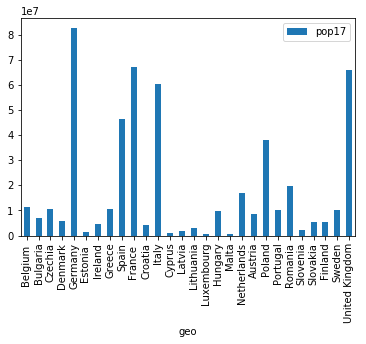

In [92]:
df.plot(kind='bar', y='pop17')

上面显示了截至2017年1月1日的人口。

我们将尝试通过两种方式对此进行改进：

- 我们想以百万计。我们可以通过将所有数据除以$10^6$来实现。

- 对该国家/地区按大小顺序进行排序会很有趣。

In [93]:
df_millions = df / 1e6

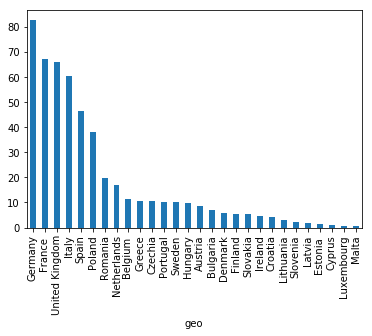

In [94]:
df_millions['pop17'].sort_values(ascending=False).plot(kind='bar')

上面的示例从数据帧（`['pop17'`）中选择一列，并返回一个`Series`对象。然后，根据值（即每个国家/地区的人数），使用`sort_values()`对这个Series对象进行排序，然后进行绘制。

另外，我们也可以为整个数据帧创建一个图，但是说`pop17`是用于排序的列，而我们只想绘制带有`pop17`的列：

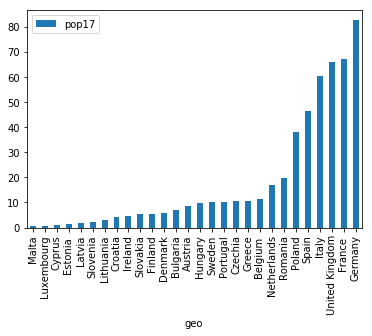

In [95]:
df_millions.sort_values(by='pop17').plot(kind='bar', y='pop17')

我们还可以同时绘制多个列：

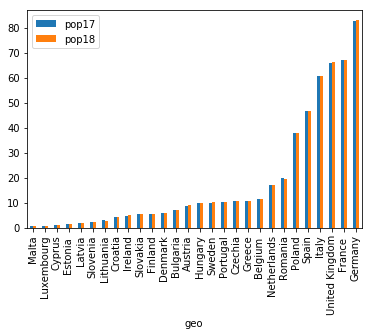

In [96]:
ax = df_millions.sort_values(by='pop17').plot(kind='bar', y=['pop17', 'pop18'])

我们还可以使用通常的`matplotlib`命令微调该图：

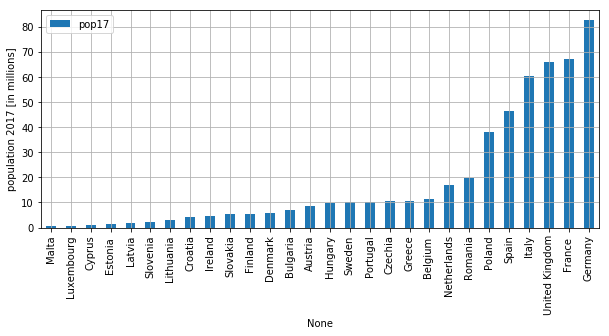

In [97]:
ax = df_millions.sort_values(by='pop17').plot(kind='bar', y='pop17', figsize=(10, 4))
ax.set_ylabel("population 2017 [in millions]")
ax.grid()
ax.set_xlabel(None);  # get rid of default label for x-axis ('geo')

根据出生和死亡人数，我们可以计算每个国家2017年的人口变化。这有时被称为“自然变化”：

In [98]:
df['natural-change'] = df['births'] - df['deaths']

In [99]:
df['natural-change'].sort_values()

geo
Italy            -190910
Germany          -148000
Romania           -71125
Bulgaria          -45836
Hungary           -37231
Greece            -36007
Spain             -31245
Portugal          -23432
Croatia           -16921
Lithuania         -11446
Latvia             -7929
Finland            -3401
Estonia            -1759
Poland              -870
Slovenia            -268
Malta                748
Luxembourg          1911
Czechia             2962
Cyprus              3232
Slovakia            4055
Austria             4363
Denmark             8136
Belgium            10024
Netherlands        19173
Sweden             23444
Ireland            31760
United Kingdom    147871
France            164550
Name: natural-change, dtype: int64

由此可见，意大利和德国因出生和死亡而造成的人口变化绝对值下降幅度最大。

为了将其与总人口规模联系起来，人们经常使用该国每年和每千人的比率，例如每千居民的出生率[1]（以及相应的死亡率）：

[1] https://zh.wikipedia.org/wiki/出生率

In [100]:
df['birth-rate'] = df['births'] / df['pop17'] * 1000
df['death-rate'] = df['deaths'] / df['pop17'] * 1000
df['natural-change-rate'] = df['natural-change'] / df['pop17'] * 1000

In [101]:
df.head()

pop17     pop18  births  deaths  natural-change  birth-rate  \
geo                                                                        
Belgium   11351727  11413058  119690  109666           10024   10.543770   
Bulgaria   7101859   7050034   63955  109791          -45836    9.005389   
Czechia   10578820  10610055  114405  111443            2962   10.814533   
Denmark    5748769   5781190   61397   53261            8136   10.680026   
Germany   82521653  82850000  785000  933000         -148000    9.512655   

          death-rate  natural-change-rate  
geo                                        
Belgium     9.660733             0.883037  
Bulgaria   15.459473            -6.454085  
Czechia    10.534540             0.279993  
Denmark     9.264766             1.415260  
Germany    11.306123            -1.793469

现在，我们可以查看每个国家的人口自然变化率，该变化率已由该国的人口归一化。

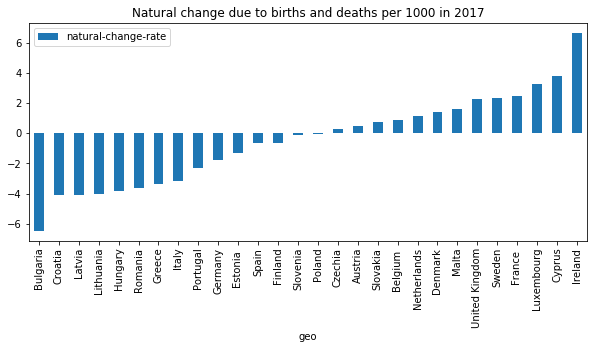

In [102]:
ax = df.sort_values(by='natural-change-rate').plot(kind='bar', y='natural-change-rate', figsize=(10, 4))
ax.set_title("Natural change due to births and deaths per 1000 in 2017");

我们可以将数据与基础出生率和死亡率数据一起显示：

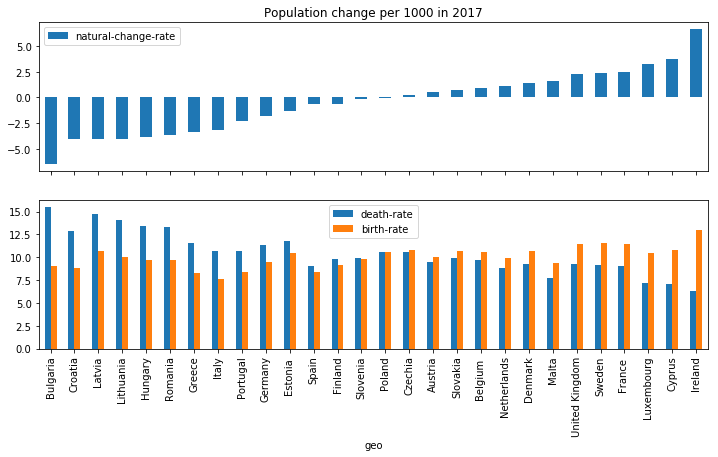

In [103]:
tmp = df.sort_values(by='natural-change-rate')

fig, axes = plt.subplots(2, 1, figsize=(12, 6))

tmp.plot(kind='bar', y=['natural-change-rate'], sharex=True, ax=axes[0])
axes[0].set_title("Population change per 1000 in 2017")
tmp.plot(kind='bar', y=['death-rate', 'birth-rate'], sharex=True, ax=axes[1])


我们尚未使用我们截至2018年1月1日的人口信息。

我们首先根据2017年1月1日和2018年1月1日的（人口普查？）数据来看一下人口的绝对变化：

In [104]:
df['change'] = df['pop18'] - df['pop17']

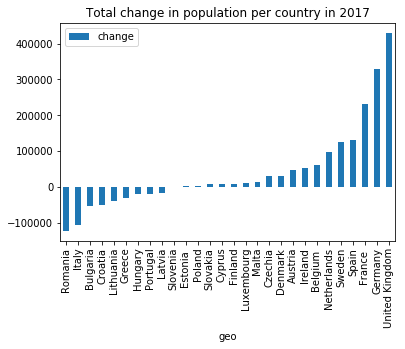

In [105]:
ax = df.sort_values(by='change').plot(y='change', kind='bar')
ax.set_title("Total change in population per country in 2017");

利用这些信息，我们可以估计迁移。 （需要注意的是，此估计数量还将吸收原始数据中称为“统计调整”的所有不准确或数据收集方法的更改。）

In [106]:
df['migration'] = df['change'] - df['natural-change']

In [107]:
df.head()

pop17     pop18  births  deaths  natural-change  birth-rate  \
geo                                                                        
Belgium   11351727  11413058  119690  109666           10024   10.543770   
Bulgaria   7101859   7050034   63955  109791          -45836    9.005389   
Czechia   10578820  10610055  114405  111443            2962   10.814533   
Denmark    5748769   5781190   61397   53261            8136   10.680026   
Germany   82521653  82850000  785000  933000         -148000    9.512655   

          death-rate  natural-change-rate  change  migration  
geo                                                           
Belgium     9.660733             0.883037   61331      51307  
Bulgaria   15.459473            -6.454085  -51825      -5989  
Czechia    10.534540             0.279993   31235      28273  
Denmark     9.264766             1.415260   32421      24285  
Germany    11.306123            -1.793469  328347     476347

让我们在最上面的子图中绘制每个国家的总人口变化，在最下面的子图中绘制自然变化和移民的贡献：

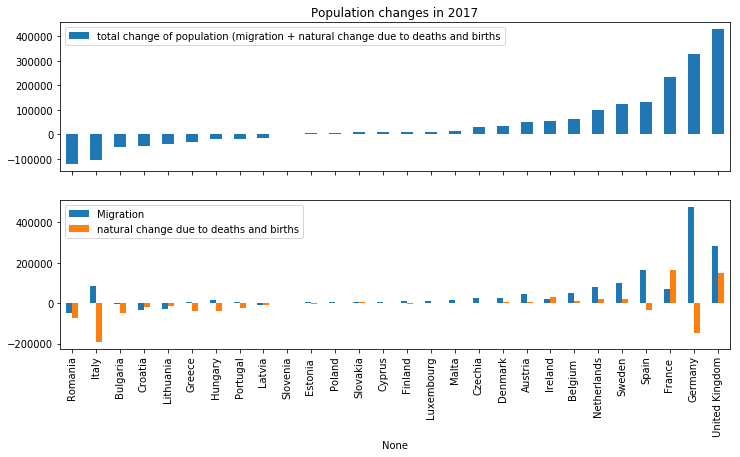

In [108]:
tmp = df.sort_values(by='change')
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

tmp.plot(kind='bar', y=['change'], sharex=True, ax=axes[0])
axes[0].set_title("Population changes in 2017")
axes[0].legend(['total change of population (migration + natural change due to deaths and births'])
tmp.plot(kind='bar', y=['migration', 'natural-change'], sharex=True, ax=axes[1])
axes[1].legend(['Migration', "natural change due to deaths and births"])
axes[1].set_xlabel(None);

## 进一步阅读

关于Pandas还有更多的话要说。以下资源可能有用，但还有无数其他可用的资源：

- 从Ted Petrou的`[]`，`.loc []`和`.iloc []`上进一步阅读 [Jupyter Notebook]( https://github.com/tdpetrou/Learn-Pandas/blob/master/Learn-Pandas/Selecting%20Subsets/01%20Selecting%20Subsets%20with%20%5B%20%5D%2C%20.loc%20and%20.iloc.ipynb) 和 [blog entry](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c)。

- Jake VanderPlas：Python数据科学手册[online](https://jakevdp.github.io/PythonDataScienceHandbook/)